In [18]:
# ====================================
# 1. IMPORT LIBRARIES & KONFIGURASI
# ====================================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import cv2

# Reproducibility
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Parameter Global
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 15
BASE_DIR = os.getcwd()
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')

print("="*60)
print("KONFIGURASI SISTEM")
print("="*60)
print(f"GPU Available    : {len(tf.config.list_physical_devices('GPU'))}")
print(f"Image Size       : {IMG_SIZE}")
print(f"Batch Size       : {BATCH_SIZE}")
print(f"Max Epochs       : {EPOCHS}")
print(f"Train Directory  : {TRAIN_DIR}")
print(f"Test Directory   : {TEST_DIR}")
print("="*60)

KONFIGURASI SISTEM
GPU Available    : 0
Image Size       : (150, 150)
Batch Size       : 32
Max Epochs       : 15
Train Directory  : c:\Users\HP\Desktop\SEMESTER 7\PENGENALAN POLA\TugasPengenalanPola_Final\train
Test Directory   : c:\Users\HP\Desktop\SEMESTER 7\PENGENALAN POLA\TugasPengenalanPola_Final\test


In [19]:
# ====================================
# 2. DATA PREPARATION & AUGMENTATION
# ====================================

# Data Augmentation untuk Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.12,
    height_shift_range=0.12,
    shear_range=0.12,
    zoom_range=0.12,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalisasi untuk Testing (tanpa augmentasi)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

class_indices = train_generator.class_indices
NUM_CLASSES = len(class_indices)

print("\n" + "="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"Total Classes        : {NUM_CLASSES}")
print(f"Class Names          : {list(class_indices.keys())}")
print(f"Training Samples     : {train_generator.samples}")
print(f"Testing Samples      : {test_generator.samples}")
print(f"Steps per Epoch      : {train_generator.samples // BATCH_SIZE}")
print("="*60)

Found 4800 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.

DATASET INFORMATION
Total Classes        : 6
Class Names          : ['Anaji', 'Bichi', 'Champa', 'Deshi', 'Shagor', 'Shobri']
Training Samples     : 4800
Testing Samples      : 1200
Steps per Epoch      : 150
Found 1200 images belonging to 6 classes.

DATASET INFORMATION
Total Classes        : 6
Class Names          : ['Anaji', 'Bichi', 'Champa', 'Deshi', 'Shagor', 'Shobri']
Training Samples     : 4800
Testing Samples      : 1200
Steps per Epoch      : 150


In [20]:
# ====================================
# 3. BUILD CNN MODEL
# ====================================

def build_cnn(input_shape=IMG_SIZE + (3,), num_classes=NUM_CLASSES):
    inputs = layers.Input(shape=input_shape)
    
    # Convolutional Block 1
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(2)(x)
    
    # Convolutional Block 2
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    # Convolutional Block 3
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same', name='last_conv')(x)
    x = layers.MaxPooling2D(2)(x)
    
    # Fully Connected Layers
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

# Build and Compile Model
model = build_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\n" + "="*60)
print("MODEL ARCHITECTURE")
print("="*60)
model.summary()
print("="*60)


MODEL ARCHITECTURE


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,711,878 (40.86 MB)

 Trainable params: 10,711,878 (40.86 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# ====================================
# 4. TRAINING
# ====================================

# Callbacks
checkpoint_cb = callbacks.ModelCheckpoint(
    'best_model.keras', 
    save_best_only=True, 
    monitor='val_accuracy', 
    mode='max',
    verbose=1
)

earlystop_cb = callbacks.EarlyStopping(
    patience=5, 
    restore_best_weights=True, 
    monitor='val_loss',
    verbose=1
)

print("\n" + "="*60)
print("TRAINING STARTED")
print("="*60)

# Training
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

print("\n" + "="*60)
print("TRAINING COMPLETED")
print("="*60)


TRAINING STARTED
Epoch 1/15
Epoch 1/15


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3610 - loss: 1.5161
Epoch 1: val_accuracy improved from -inf to 0.58917, saving model to best_model.keras

Epoch 1: val_accuracy improved from -inf to 0.58917, saving model to best_model.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.3616 - loss: 1.5147 - val_accuracy: 0.5892 - val_loss: 1.0379
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.3616 - loss: 1.5147 - val_accuracy: 0.5892 - val_loss: 1.0379
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.6546 - loss: 0.8948
Epoch 2: val_accuracy did not improve from 0.58917

Epoch 2: val_accuracy did not improve from 0.58917
150/150 ━━━━━━━━━━━━━━━━━━━━ 106s 695ms/step - accuracy: 0.6548 - loss: 0.8943 - val_accuracy: 0.5625 - val_loss: 1.0131
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 106s 695ms/step - accuracy: 0.6548 - loss: 0.8943 - val_accuracy: 0.5625 - val_loss: 1.0131
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accura

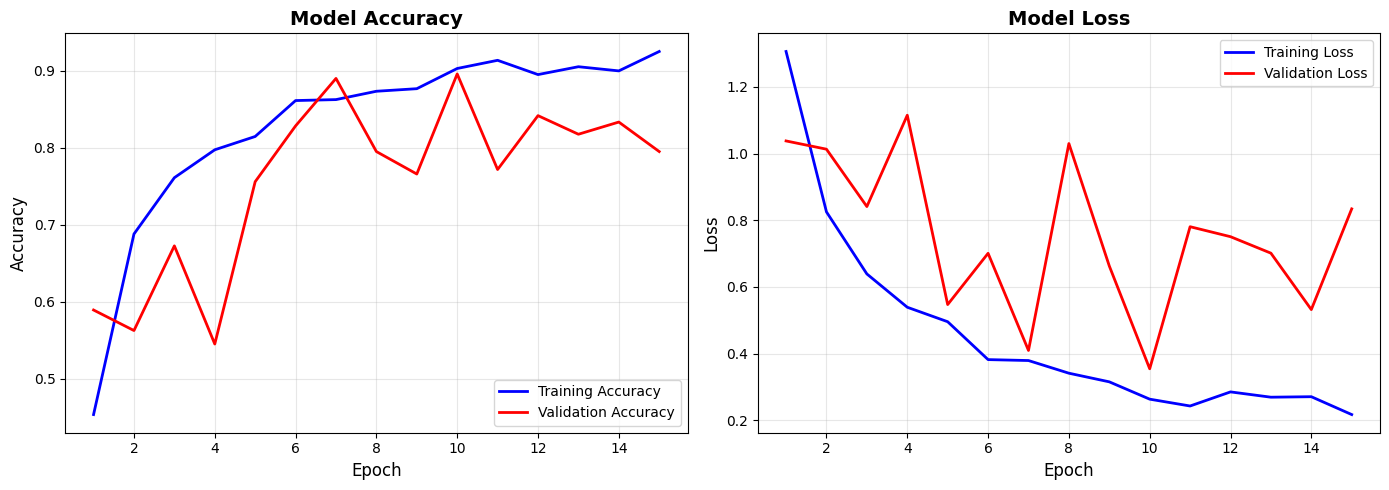


TRAINING SUMMARY
Total Epochs         : 15/15
Best Val Accuracy    : 0.8958
Final Train Accuracy : 0.9250
Final Val Accuracy   : 0.7950
Final Train Loss     : 0.2173
Final Val Loss       : 0.8342


In [22]:
# ====================================
# 5. TRAINING HISTORY VISUALIZATION
# ====================================

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Plot
ax1.plot(epochs_range, acc, 'b-', label='Training Accuracy', linewidth=2)
ax1.plot(epochs_range, val_acc, 'r-', label='Validation Accuracy', linewidth=2)
ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Loss Plot
ax2.plot(epochs_range, loss, 'b-', label='Training Loss', linewidth=2)
ax2.plot(epochs_range, val_loss, 'r-', label='Validation Loss', linewidth=2)
ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Total Epochs         : {len(acc)}/{EPOCHS}")
print(f"Best Val Accuracy    : {max(val_acc):.4f}")
print(f"Final Train Accuracy : {acc[-1]:.4f}")
print(f"Final Val Accuracy   : {val_acc[-1]:.4f}")
print(f"Final Train Loss     : {loss[-1]:.4f}")
print(f"Final Val Loss       : {val_loss[-1]:.4f}")
print("="*60)

In [23]:
# ====================================
# 9. GRAD-CAM VISUALIZATION (Helper Function)
# ====================================

def make_gradcam_heatmap(img_array, model, last_conv_layer_name='last_conv', pred_index=None):
    """Generate Grad-CAM heatmap for model interpretability"""
    grad_model = tf.keras.models.Model(
        model.inputs, 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)
    
    max_val = tf.math.reduce_max(heatmap)
    if max_val == 0:
        return np.zeros(heatmap.shape)
    heatmap /= max_val
    return heatmap.numpy()

print("Grad-CAM function loaded successfully")

Grad-CAM function loaded successfully


GRAD-CAM VISUALIZATION EXAMPLE
Sample Image: Anaji-0001.jpg


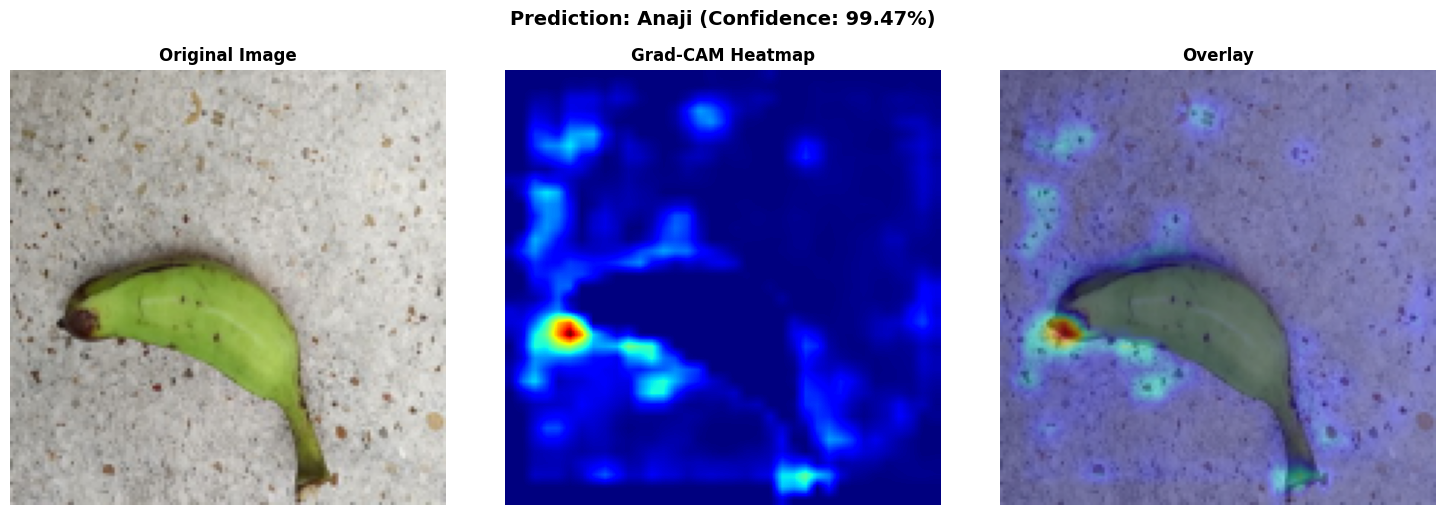

In [24]:
# ====================================
# 10. GRAD-CAM EXAMPLE VISUALIZATION
# ====================================

def display_gradcam(img_path, model, last_conv_layer_name='last_conv', alpha=0.4):
    """Display original image, heatmap, and overlay"""
    # Load and preprocess
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    input_arr = np.expand_dims(img_array, axis=0)
    
    # Predict and generate heatmap
    preds = model.predict(input_arr, verbose=0)
    pred_class = np.argmax(preds[0])
    pred_prob = preds[0][pred_class]
    heatmap = make_gradcam_heatmap(input_arr, model, last_conv_layer_name, pred_index=pred_class)
    
    # Overlay heatmap
    orig = cv2.imread(img_path)
    orig = cv2.resize(orig, IMG_SIZE)
    heatmap_resized = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(orig, 1 - alpha, heatmap_color, alpha, 0)
    
    # Get class name
    class_name = list(class_indices.keys())[list(class_indices.values()).index(pred_class)]
    
    # Display
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image', fontsize=12, fontweight='bold')
    axes[0].axis('off')
    
    axes[1].imshow(heatmap_resized, cmap='jet')
    axes[1].set_title('Grad-CAM Heatmap', fontsize=12, fontweight='bold')
    axes[1].axis('off')
    
    axes[2].imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Overlay', fontsize=12, fontweight='bold')
    axes[2].axis('off')
    
    plt.suptitle(f'Prediction: {class_name} (Confidence: {pred_prob:.2%})', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Example: visualize first test image
sample_path = test_generator.filepaths[0]
print("="*60)
print("GRAD-CAM VISUALIZATION EXAMPLE")
print("="*60)
print(f"Sample Image: {os.path.basename(sample_path)}")
print("="*60)
display_gradcam(sample_path, model)

In [25]:
# ====================================
# 6. MODEL EVALUATION
# ====================================

test_loss, test_acc = model.evaluate(test_generator, verbose=0)

print("\n" + "="*60)
print("TEST SET EVALUATION")
print("="*60)
print(f"Test Accuracy        : {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss            : {test_loss:.4f}")
print("="*60)


TEST SET EVALUATION
Test Accuracy        : 0.8958 (89.58%)
Test Loss            : 0.3546


In [26]:
# ====================================
# 11. DATASET DISTRIBUTION ANALYSIS
# ====================================

print("\n" + "="*60)
print("DATASET DISTRIBUTION ANALYSIS")
print("="*60)

print("\nTRAINING SET:")
print("-" * 60)
print(f"{'Class':<15} {'Images':<10} {'Percentage'}")
print("-" * 60)
train_total = 0
for cls, idx in sorted(class_indices.items(), key=lambda x: x[1]):
    train_path = os.path.join(TRAIN_DIR, cls)
    num_files = len([f for f in os.listdir(train_path) if os.path.isfile(os.path.join(train_path, f))])
    train_total += num_files
    print(f"{cls:<15} {num_files:<10} {num_files/train_generator.samples*100:>6.2f}%")
print("-" * 60)
print(f"{'TOTAL':<15} {train_total:<10}")

print("\n" + "-" * 60)
print("TESTING SET:")
print("-" * 60)
print(f"{'Class':<15} {'Images':<10} {'Percentage'}")
print("-" * 60)
test_total = 0
for cls, idx in sorted(class_indices.items(), key=lambda x: x[1]):
    test_path = os.path.join(TEST_DIR, cls)
    num_files = len([f for f in os.listdir(test_path) if os.path.isfile(os.path.join(test_path, f))])
    test_total += num_files
    print(f"{cls:<15} {num_files:<10} {num_files/test_generator.samples*100:>6.2f}%")
print("-" * 60)
print(f"{'TOTAL':<15} {test_total:<10}")

print("\n" + "="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Total Training Samples   : {train_total}")
print(f"Total Testing Samples    : {test_total}")
print(f"Total Samples            : {train_total + test_total}")
print(f"Number of Classes        : {NUM_CLASSES}")
print(f"Train/Test Ratio         : {train_total/test_total:.2f}:1")
print("="*60)


DATASET DISTRIBUTION ANALYSIS

TRAINING SET:
------------------------------------------------------------
Class           Images     Percentage
------------------------------------------------------------
Anaji           800         16.67%
Bichi           800         16.67%
Champa          800         16.67%
Deshi           800         16.67%
Shagor          800         16.67%
Shobri          800         16.67%
------------------------------------------------------------
TOTAL           4800      

------------------------------------------------------------
TESTING SET:
------------------------------------------------------------
Class           Images     Percentage
------------------------------------------------------------
Anaji           200         16.67%
Bichi           200         16.67%
Champa          200         16.67%
Deshi           200         16.67%
Shagor          200         16.67%
Shobri          200         16.67%
---------------------------------------------------

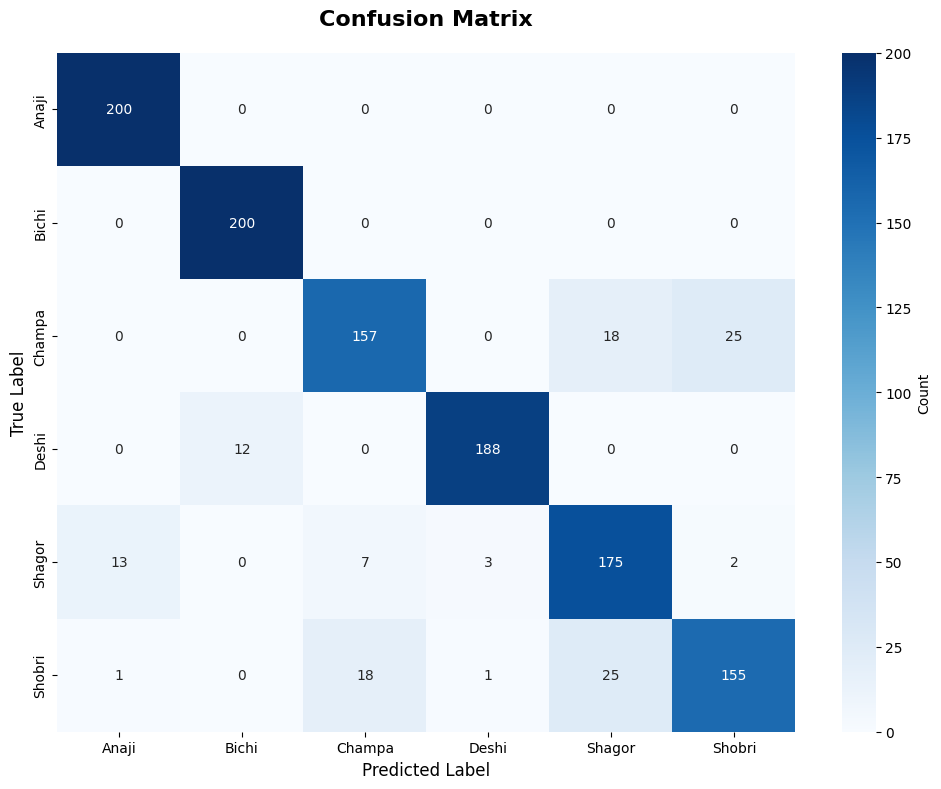


CLASSIFICATION REPORT
              precision    recall  f1-score   support

       Anaji     0.9346    1.0000    0.9662       200
       Bichi     0.9434    1.0000    0.9709       200
      Champa     0.8626    0.7850    0.8220       200
       Deshi     0.9792    0.9400    0.9592       200
      Shagor     0.8028    0.8750    0.8373       200
      Shobri     0.8516    0.7750    0.8115       200

    accuracy                         0.8958      1200
   macro avg     0.8957    0.8958    0.8945      1200
weighted avg     0.8957    0.8958    0.8945      1200


PER-CLASS ACCURACY
Class           Accuracy     Correct/Total
------------------------------------------------------------
Anaji           1.0000 (100.00%)  200/200
Bichi           1.0000 (100.00%)  200/200
Champa          0.7850 (78.50%)  157/200
Deshi           0.9400 (94.00%)  188/200
Shagor          0.8750 (87.50%)  175/200
Shobri          0.7750 (77.50%)  155/200


In [27]:
# ====================================
# 7. CONFUSION MATRIX & CLASSIFICATION REPORT
# ====================================

# Predictions
test_generator.reset()
y_pred = model.predict(test_generator, steps=len(test_generator), verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_names = list(class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_true, y_pred_classes, target_names=class_names, digits=4))

# Per-Class Accuracy
print("\n" + "="*60)
print("PER-CLASS ACCURACY")
print("="*60)
print(f"{'Class':<15} {'Accuracy':<12} {'Correct/Total'}")
print("-" * 60)
for i, cls_name in enumerate(class_names):
    cls_mask = y_true == i
    cls_correct = np.sum(y_pred_classes[cls_mask] == y_true[cls_mask])
    cls_total = np.sum(cls_mask)
    cls_acc = cls_correct / cls_total if cls_total > 0 else 0
    print(f"{cls_name:<15} {cls_acc:.4f} ({cls_acc*100:>5.2f}%)  {cls_correct:>3}/{cls_total:<3}")
print("="*60)

In [28]:
# ====================================
# 8. OVERFITTING ANALYSIS
# ====================================

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
gap = final_train_acc - final_val_acc

print("\n" + "="*60)
print("OVERFITTING ANALYSIS")
print("="*60)
print(f"Final Train Accuracy : {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"Final Val Accuracy   : {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"Accuracy Gap         : {gap:.4f} ({gap*100:.2f}%)")
print(f"Final Train Loss     : {final_train_loss:.4f}")
print(f"Final Val Loss       : {final_val_loss:.4f}")
print(f"Loss Ratio (Val/Train): {final_val_loss/final_train_loss:.2f}x")
print("-" * 60)

# Diagnosis
if gap > 0.15:
    status = "OVERFITTING DETECTED"
    recommendation = "Model menghafal data training. Perbaiki dengan:\n   - Tambah data training\n   - Tingkatkan augmentasi\n   - Tambah dropout/regularization"
elif gap > 0.10:
    status = "MILD OVERFITTING"
    recommendation = "Model cukup baik, bisa ditingkatkan dengan:\n   - Sedikit tambah regularization\n   - Monitor lebih lama dengan patience"
elif final_train_acc < 0.70:
    status = "UNDERFITTING DETECTED"
    recommendation = "Model kurang belajar. Perbaiki dengan:\n   - Tambah kompleksitas model\n   - Latih lebih lama\n   - Turunkan regularization"
else:
    status = "MODEL BALANCED"
    recommendation = "Model sudah cukup baik!"

print(f"Status               : {status}")
print(f"Rekomendasi          : {recommendation}")
print("="*60)

# Overall Performance Rating
if final_val_acc >= 0.90 and gap < 0.10:
    rating = "EXCELLENT (5/5)"
elif final_val_acc >= 0.85 and gap < 0.12:
    rating = "VERY GOOD (4/5)"
elif final_val_acc >= 0.75 and gap < 0.15:
    rating = "GOOD (3/5)"
elif final_val_acc >= 0.65:
    rating = "FAIR (2/5)"
else:
    rating = "NEEDS IMPROVEMENT (1/5)"

print(f"\nOverall Performance  : {rating}")
print("="*60)


OVERFITTING ANALYSIS
Final Train Accuracy : 0.9250 (92.50%)
Final Val Accuracy   : 0.7950 (79.50%)
Accuracy Gap         : 0.1300 (13.00%)
Final Train Loss     : 0.2173
Final Val Loss       : 0.8342
Loss Ratio (Val/Train): 3.84x
------------------------------------------------------------
Status               : MILD OVERFITTING
Rekomendasi          : Model cukup baik, bisa ditingkatkan dengan:
   - Sedikit tambah regularization
   - Monitor lebih lama dengan patience

Overall Performance  : GOOD (3/5)


In [29]:
# ====================================
# 12. SAVE MODEL FOR DEPLOYMENT
# ====================================

# Save model dalam format yang kompatibel untuk deployment
model.save('fish_classifier_model.h5')
model.save('fish_classifier_model.keras')

# Save class indices untuk mapping prediksi
import json
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

print("\n" + "="*60)
print("MODEL SAVED FOR DEPLOYMENT")
print("="*60)
print(f"Model file (HDF5)    : fish_classifier_model.h5")
print(f"Model file (Keras)   : fish_classifier_model.keras")
print(f"Class mapping        : class_indices.json")
print("="*60)
print("\nModel siap untuk deployment ke web application!")


MODEL SAVED FOR DEPLOYMENT
Model file (HDF5)    : fish_classifier_model.h5
Model file (Keras)   : fish_classifier_model.keras
Class mapping        : class_indices.json

Model siap untuk deployment ke web application!
